# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("pickle/fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("pickle/fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("pickle/fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("pickle/fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("pickle/reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("pickle/ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

In [11]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [12]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


### Analysis of Facebook Wiki

In [13]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [14]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [15]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [16]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

In [17]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [18]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


### Analysis of Fitocracy

In [19]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [20]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [21]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

In [22]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

In [23]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

### Analysis of Reddit

In [24]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [25]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [26]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [27]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

In [28]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

In [29]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
reddit_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M                              1045003
           M                     80705
           W                     22883
W                               275287
           M                     21825
           W                      7809
Name: responder_gender, dtype: int64

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit.

In [30]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


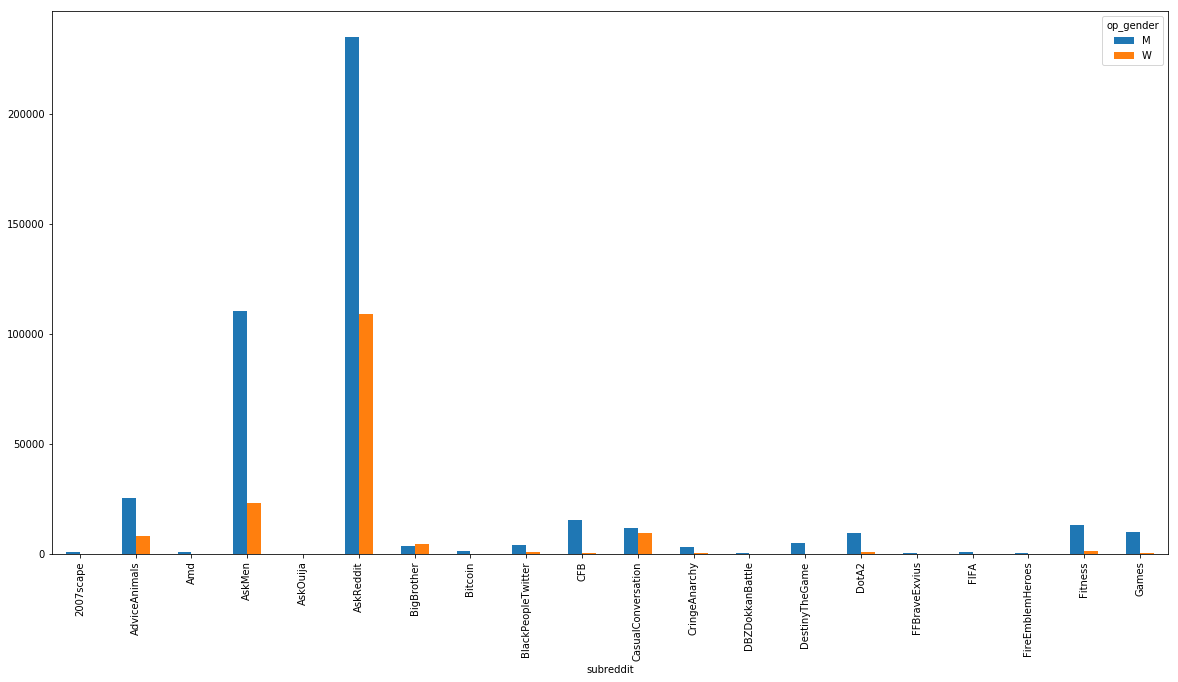

In [31]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [32]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

### Analysis of TED

In [33]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [34]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [35]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [36]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [37]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# should I do a stratified sample?
fb_congress_sample = fb_congress_df.sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
291,9,link,57265377,Roger Williams,Congress_Republican,M,Ann,"""I agree 100% with President Trump's decision....",How does anyone know this ban is effective? H...
457,18,video,57265377,Roger Williams,Congress_Republican,M,Stacey,It's time to put Obama in the history books. W...,I wonder if your staff does read these comment...
1066,28,video,57265377,Roger Williams,Congress_Republican,M,Tim,Shameful.,Special kinda dumbass.
1245,32,video,57265377,Roger Williams,Congress_Republican,M,Betty,"In Texas, we're proud to say Merry Christmas.",Yepp we do
1282,32,video,57265377,Roger Williams,Congress_Republican,M,Barry,"In Texas, we're proud to say Merry Christmas.",Just speak the truth in his light and you will...


In [38]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      17007
photo     14602
status     9583
video      8721
event        67
note         18
music         2
Name: post_type, dtype: int64
Congress_Republican     31706
Congress_Democratic     17110
Congress_Independent      704
                          480
Name: op_category, dtype: int64
M    37532
W    12468
Name: op_gender, dtype: int64


In [39]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [40]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
291,9,link,57265377,Roger Williams,Congress_Republican,M,Ann,"""I agree 100% with President Trump's decision....",How does anyone know this ban is effective? H...,"[``, I, agree, 100, %, with, President, Trump,...","[How, does, anyone, know, this, ban, is, effec...",57,28
457,18,video,57265377,Roger Williams,Congress_Republican,M,Stacey,It's time to put Obama in the history books. W...,I wonder if your staff does read these comment...,"[It, 's, time, to, put, Obama, in, the, histor...","[I, wonder, if, your, staff, does, read, these...",37,137
1066,28,video,57265377,Roger Williams,Congress_Republican,M,Tim,Shameful.,Special kinda dumbass.,"[Shameful, .]","[Special, kinda, dumbass, .]",2,4
1245,32,video,57265377,Roger Williams,Congress_Republican,M,Betty,"In Texas, we're proud to say Merry Christmas.",Yepp we do,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Yepp, we, do]",11,3
1282,32,video,57265377,Roger Williams,Congress_Republican,M,Barry,"In Texas, we're proud to say Merry Christmas.",Just speak the truth in his light and you will...,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Just, speak, the, truth, in, his, light, and,...",11,38


Let's look at length in a boxplot grouping by gender!

average post length when poster is male: 58.17835447085154
average post length when poster is female: 77.32723772858517


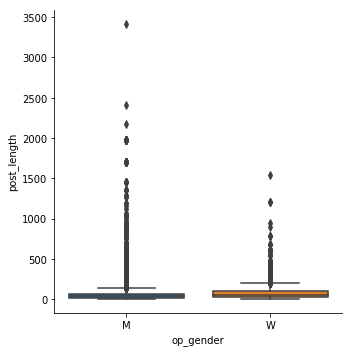

In [41]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_congress_sample)
print('average post length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length.mean())

So female posters seem to typically have longer posts than male posters! Let's look at some more details:

In [42]:
fb_congress_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                        \
                count       mean         std  min   25%   50%   75%     max   
op_gender                                                                     
M             37532.0  58.178354  100.198029  0.0  19.0  35.0  66.0  3419.0   
W             12468.0  77.327238   81.276843  0.0  27.0  53.0  97.0  1542.0   

          response_length                                                      
                    count       mean        std  min  25%   50%   75%     max  
op_gender                                                                      
M                 37532.0  31.156746  64.254189  0.0  7.0  15.0  33.0  2238.0  
W                 12468.0  31.675730  63.463607  0.0  7.0  16.0  34.0  1917.0

average response length when poster is male: 31.1567462432058
average response length when poster is female: 31.675729868463264


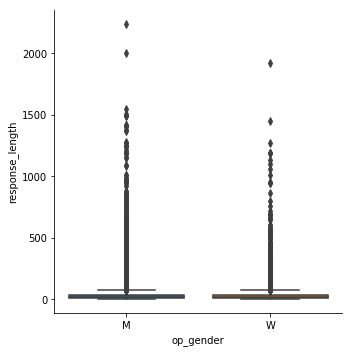

In [43]:
# plot the response length too
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].response_length.mean())

This time, op_gender doesn't make much of a difference in the length of the responses.

In [44]:
# getting sentence lengths
post_sent_count = fb_congress_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_congress_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
# find average sentence length
post_avg_sent_length = fb_congress_sample.post_length / post_sent_count
response_avg_sent_length = fb_congress_sample.response_length / response_sent_count

In [46]:
# make new columns
fb_congress_sample['post_avg_slen'] = post_avg_sent_length
fb_congress_sample['response_avg_slen'] = response_avg_sent_length

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
291,9,link,57265377,Roger Williams,Congress_Republican,M,Ann,"""I agree 100% with President Trump's decision....",How does anyone know this ban is effective? H...,"[``, I, agree, 100, %, with, President, Trump,...","[How, does, anyone, know, this, ban, is, effec...",57,28,14.25,9.333333
457,18,video,57265377,Roger Williams,Congress_Republican,M,Stacey,It's time to put Obama in the history books. W...,I wonder if your staff does read these comment...,"[It, 's, time, to, put, Obama, in, the, histor...","[I, wonder, if, your, staff, does, read, these...",37,137,18.50,19.571429
1066,28,video,57265377,Roger Williams,Congress_Republican,M,Tim,Shameful.,Special kinda dumbass.,"[Shameful, .]","[Special, kinda, dumbass, .]",2,4,2.00,4.000000
1245,32,video,57265377,Roger Williams,Congress_Republican,M,Betty,"In Texas, we're proud to say Merry Christmas.",Yepp we do,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Yepp, we, do]",11,3,11.00,3.000000
1282,32,video,57265377,Roger Williams,Congress_Republican,M,Barry,"In Texas, we're proud to say Merry Christmas.",Just speak the truth in his light and you will...,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Just, speak, the, truth, in, his, light, and,...",11,38,11.00,9.500000


In [47]:
# does gender of poster have an impact on sentence length?
fb_congress_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                    \
                  count       mean       std  min   25%    50%        75%   
op_gender                                                                   
M               35440.0  17.830835  8.940078  1.0  11.5  16.75  22.600000   
W               12115.0  19.338120  8.268005  1.0  13.5  18.60  24.333333   

                 response_avg_slen                                             \
             max             count       mean        std  min  25%  50%   75%   
op_gender                                                                       
M          191.0           37140.0  11.667361  11.015537  1.0  5.0  9.5  15.0   
W           88.0           12358.0  11.752008  11.451019  1.0  5.0  9.5  15.0   

                  
             max  
op_gender         
M          506.0  
W          504.0

It seems like female posters may use slightly longer sentences than male posters. Again, the length of the responses doesn't seem to change dependent on the gender of the poster.

Should we add a TTR column?

In [48]:
# define TTR
def get_ttr(tokens):
    lower = [w.lower() for w in tokens]
    if len(lower) == 0:   # sometimes there was no text
        return None
    else:
        return len(set(lower))/len(lower)

In [49]:
# add to df
#fb_congress_sample['post_TTR'] = fb_congress_sample.post_tokens.map(get_ttr)
#fb_congress_sample['response_TTR'] = fb_congress_sample.response_tokens.map(get_ttr)
#fb_congress_sample.head()

Commented the above out because: is TTR even useful here? Sometimes the responses are so short that they have a TTR of 1. This doesn't help us.

It doesn't seem to make sense to calculate TTR at all since online posts are pretty short to begin with. TTR isn't very meaningful when there aren't very many words to even look at.

How about average google k-band?

In [50]:
# thanks Na-Rae for this code!

# reading file and setting up
# credit of the Google 1T English unigram frequency list goes to Peter Norbig's site: http://norvig.com/ngrams/
# these files can be used under the MIT license
google_1gram_lines = open('count_1w.txt').readlines()
google_1gram_tup = [tuple(line.split()) for line in google_1gram_lines]
google_1gram_rank = {word:index+1 for (index,(word, count)) in enumerate(google_1gram_tup)}

In [51]:
# thanks Na-Rae for this code!

import math

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 20000:  # limiting to 20k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [52]:
# applying to df
fb_congress_sample['post_avg_kband'] = fb_congress_sample.post_tokens.map(get_avg_google_kband)
fb_congress_sample['response_avg_kband'] = fb_congress_sample.response_tokens.map(get_avg_google_kband)

fb_congress_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
291,9,link,57265377,Roger Williams,Congress_Republican,M,Ann,"""I agree 100% with President Trump's decision....",How does anyone know this ban is effective? H...,"[``, I, agree, 100, %, with, President, Trump,...","[How, does, anyone, know, this, ban, is, effec...",57,28,14.25,9.333333,2.906977,1.360000
457,18,video,57265377,Roger Williams,Congress_Republican,M,Stacey,It's time to put Obama in the history books. W...,I wonder if your staff does read these comment...,"[It, 's, time, to, put, Obama, in, the, histor...","[I, wonder, if, your, staff, does, read, these...",37,137,18.50,19.571429,2.096774,2.201923
1066,28,video,57265377,Roger Williams,Congress_Republican,M,Tim,Shameful.,Special kinda dumbass.,"[Shameful, .]","[Special, kinda, dumbass, .]",2,4,2.00,4.000000,NaN,5.500000
1245,32,video,57265377,Roger Williams,Congress_Republican,M,Betty,"In Texas, we're proud to say Merry Christmas.",Yepp we do,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Yepp, we, do]",11,3,11.00,3.000000,2.625000,1.000000
1282,32,video,57265377,Roger Williams,Congress_Republican,M,Barry,"In Texas, we're proud to say Merry Christmas.",Just speak the truth in his light and you will...,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[Just, speak, the, truth, in, his, light, and,...",11,38,11.00,9.500000,2.625000,2.235294


In [53]:
fb_congress_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                35352.0  2.432989  0.836811  1.0  1.916667  2.317073   
W                12085.0  2.380772  0.718047  1.0  1.941667  2.279070   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.750000  16.0            36306.0  2.768916  2.232811  1.0   
W          2.712644  17.5            12127.0  2.773684  2.190789  1.0   

                                         
                25%      50%  75%   max  
op_gender                                
M          1.642857  2.19403  3.0  20.0  
W          1.666667  2.22500  3.0  20.0

What does this tell us? Not much - the average k-band is about the same for male vs. female posters and in responses to male vs. female posters.

### Facebook Wiki linguistic analysis

In [54]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [55]:
# still too large for my analysis, let's reduce to 50,000 again
fb_wiki_sample = fb_wiki_df.sample(50000)
fb_wiki_sample.sort_index(inplace=True)

In [56]:
# tokenize...
fb_wiki_sample['post_tokens'] = fb_wiki_sample.post_text.map(nltk.word_tokenize)
fb_wiki_sample['response_tokens'] = fb_wiki_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fb_wiki_sample['post_length'] = fb_wiki_sample.post_tokens.map(len)
fb_wiki_sample['response_length'] = fb_wiki_sample.response_tokens.map(len)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
10,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Bonnie,Tornado watch in effect tonight. Be safe. Plea...,thanks byron,"[Tornado, watch, in, effect, tonight, ., Be, s...","[thanks, byron]",22,2
27,2,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Bernetta,Temps warming up for the holiday weekend! I wi...,"Thanks, Byron!","[Temps, warming, up, for, the, holiday, weeken...","[Thanks, ,, Byron, !]",20,4
406,44,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Rosalie,"Hey I misspoke, Rob Stafford can use your pray...",Get well Rob Stanford. 😢💞,"[Hey, I, misspoke, ,, Rob, Stafford, can, use,...","[Get, well, Rob, Stanford, ., 😢💞]",21,6
478,49,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Jane,Severe storms possible tomorrow. A tornado can...,Please keep us updated. Thank you. :),"[Severe, storms, possible, tomorrow, ., A, tor...","[Please, keep, us, updated, ., Thank, you, ., ...",41,10
659,68,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sue,"As forecasted on Friday, we hit 77 degrees tod...",Thanks for the information - Batten down the h...,"[As, forecasted, on, Friday, ,, we, hit, 77, d...","[Thanks, for, the, information, -, Batten, dow...",21,14


average post length when poster is male: 38.47110898432827
average post length when poster is female: 28.438976023075536


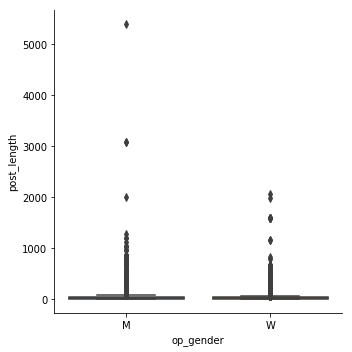

In [57]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_wiki_sample)

print('average post length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length.mean())

Interestingly, this is opposite from the Facebook Congress data. This time, the male posters have longer posts. It could also be specific to the sample - I'll have to make sure different samples are consistent to these results.

average response length when poster is male: 14.781253738485464
average response length when poster is female: 13.558530136410072


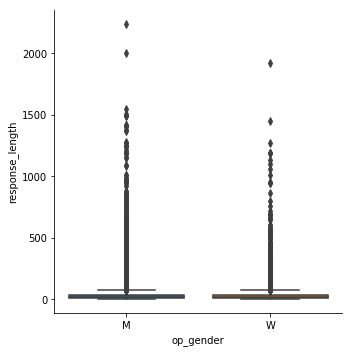

In [58]:
# look at response length again
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].response_length.mean())

Again, not a large difference in response length when responding to male vs. female posters.

In [59]:
# summary of post and response length
fb_wiki_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             16718.0  38.471109  91.422029  0.0  6.0  17.0  34.0  5396.0   
W             33282.0  28.438976  47.848416  0.0  8.0  20.0  32.0  2051.0   

          response_length                                                     
                    count       mean        std  min  25%  50%   75%     max  
op_gender                                                                     
M                 16718.0  14.781254  33.275673  0.0  3.0  7.0  15.0  1325.0  
W                 33282.0  13.558530  30.834534  0.0  3.0  6.0  13.0  1297.0

In [60]:
# getting sentence lengths
post_sent_count = fb_wiki_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_wiki_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [61]:
# find average sentence length
post_avg_sent_length = fb_wiki_sample.post_length / post_sent_count
response_avg_sent_length = fb_wiki_sample.response_length / response_sent_count

In [62]:
# make new columns
fb_wiki_sample['post_avg_slen'] = post_avg_sent_length
fb_wiki_sample['response_avg_slen'] = response_avg_sent_length

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
10,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Bonnie,Tornado watch in effect tonight. Be safe. Plea...,thanks byron,"[Tornado, watch, in, effect, tonight, ., Be, s...","[thanks, byron]",22,2,7.333333,2.000000
27,2,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Bernetta,Temps warming up for the holiday weekend! I wi...,"Thanks, Byron!","[Temps, warming, up, for, the, holiday, weeken...","[Thanks, ,, Byron, !]",20,4,6.666667,4.000000
406,44,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Rosalie,"Hey I misspoke, Rob Stafford can use your pray...",Get well Rob Stanford. 😢💞,"[Hey, I, misspoke, ,, Rob, Stafford, can, use,...","[Get, well, Rob, Stanford, ., 😢💞]",21,6,10.500000,3.000000
478,49,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Jane,Severe storms possible tomorrow. A tornado can...,Please keep us updated. Thank you. :),"[Severe, storms, possible, tomorrow, ., A, tor...","[Please, keep, us, updated, ., Thank, you, ., ...",41,10,8.200000,3.333333
659,68,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sue,"As forecasted on Friday, we hit 77 degrees tod...",Thanks for the information - Batten down the h...,"[As, forecasted, on, Friday, ,, we, hit, 77, d...","[Thanks, for, the, information, -, Batten, dow...",21,14,7.000000,14.000000


In [63]:
# does gender of poster have an impact on sentence length?
fb_wiki_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                  \
                  count       mean       std  min  25%   50%        75%   
op_gender                                                                 
M               15005.0  11.714440  9.657951  1.0  6.0   9.5  15.500000   
W               29561.0  10.984174  8.615933  1.0  7.0  10.0  13.666667   

                 response_avg_slen                                          \
             max             count      mean       std  min  25%  50%  75%   
op_gender                                                                    
M          424.0           16648.0  7.460267  8.769301  1.0  3.0  5.0  9.5   
W          527.0           33187.0  7.247972  8.878467  1.0  2.5  5.0  9.0   

                  
             max  
op_gender         
M          387.0  
W          464.0

This time, sentence length looks about equal in male vs. female posts, and well as in responses to male vs. female posters.

In [64]:
# average google k-band
# applying to df
fb_wiki_sample['post_avg_kband'] = fb_wiki_sample.post_tokens.map(get_avg_google_kband)
fb_wiki_sample['response_avg_kband'] = fb_wiki_sample.response_tokens.map(get_avg_google_kband)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
10,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Bonnie,Tornado watch in effect tonight. Be safe. Plea...,thanks byron,"[Tornado, watch, in, effect, tonight, ., Be, s...","[thanks, byron]",22,2,7.333333,2.000000,2.111111,6.000000
27,2,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Bernetta,Temps warming up for the holiday weekend! I wi...,"Thanks, Byron!","[Temps, warming, up, for, the, holiday, weeken...","[Thanks, ,, Byron, !]",20,4,6.666667,4.000000,2.705882,6.000000
406,44,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Rosalie,"Hey I misspoke, Rob Stafford can use your pray...",Get well Rob Stanford. 😢💞,"[Hey, I, misspoke, ,, Rob, Stafford, can, use,...","[Get, well, Rob, Stanford, ., 😢💞]",21,6,10.500000,3.000000,3.750000,3.500000
478,49,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Jane,Severe storms possible tomorrow. A tornado can...,Please keep us updated. Thank you. :),"[Severe, storms, possible, tomorrow, ., A, tor...","[Please, keep, us, updated, ., Thank, you, ., ...",41,10,8.200000,3.333333,2.636364,1.166667
659,68,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sue,"As forecasted on Friday, we hit 77 degrees tod...",Thanks for the information - Batten down the h...,"[As, forecasted, on, Friday, ,, we, hit, 77, d...","[Thanks, for, the, information, -, Batten, dow...",21,14,7.000000,14.000000,2.785714,1.125000


In [65]:
fb_wiki_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                14728.0  2.786618  1.788705  1.0  1.818182  2.411765   
W                29072.0  2.613437  1.479266  1.0  1.740741  2.303030   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          3.142857  18.0            15057.0  3.567413  3.379519  1.0   
W          3.047619  20.0            30255.0  3.871627  3.844524  1.0   

                                               
                25%       50%       75%   max  
op_gender                                      
M          1.500000  2.333333  4.000000  20.0  
W          1.555556  2.375000  4.333333  20.0

What does this tell us? Again - not much. The average k-band is about the same for all.

### Fitocracy linguistic analysis

In [66]:
# how big is this?
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [67]:
# again reduce to 50,000
fitocracy_sample = fitocracy_df.sample(50000)
fitocracy_sample.sort_index(inplace=True)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
14,14,117,M,32387,W,"Alright dammit -- what's ""running"" and what's ...",When in doubt: whore.
20,20,117,M,26833,M,just joined the Scotch Whisky group!,y u no join gin group?
22,22,117,M,36539,M,Bleh. Months of almost-no or negative progress...,"fuck it, genetic ceiling reached, time to roid"
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH


So now we have both op gender and responder gender. I want to figure out how to put all of this in a box plot together for easier visualization... look into this. For now, moving on.

In [68]:
# tokenize...
fitocracy_sample['post_tokens'] = fitocracy_sample.post_text.map(nltk.word_tokenize)
fitocracy_sample['response_tokens'] = fitocracy_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fitocracy_sample['post_length'] = fitocracy_sample.post_tokens.map(len)
fitocracy_sample['response_length'] = fitocracy_sample.response_tokens.map(len)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9
14,14,117,M,32387,W,"Alright dammit -- what's ""running"" and what's ...",When in doubt: whore.,"[Alright, dammit, --, what, 's, ``, running, '...","[When, in, doubt, :, whore, .]",42,6
20,20,117,M,26833,M,just joined the Scotch Whisky group!,y u no join gin group?,"[just, joined, the, Scotch, Whisky, group, !]","[y, u, no, join, gin, group, ?]",7,7
22,22,117,M,36539,M,Bleh. Months of almost-no or negative progress...,"fuck it, genetic ceiling reached, time to roid","[Bleh, ., Months, of, almost-no, or, negative,...","[fuck, it, ,, genetic, ceiling, reached, ,, ti...",74,10
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1


In [69]:
fitocracy_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                     \
                count       mean        std  min  25%   50%   75%    max   
op_gender                                                                  
M             27350.0  17.108921  18.069532  1.0  7.0  11.0  20.0  578.0   
W             22650.0  18.752583  19.625245  1.0  8.0  11.0  22.0  421.0   

          response_length                                                     
                    count       mean        std  min  25%   50%   75%    max  
op_gender                                                                     
M                 27350.0  24.771773  28.949365  1.0  6.0  12.0  29.0  406.0  
W                 22650.0  28.061898  31.323819  1.0  6.0  13.0  36.0  407.0

In [70]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12441.0  16.910457  19.316879  1.0  5.0  10.0   
          W                 14909.0  31.331746  33.637311  1.0  6.0  14.0   
W         M                 11790.0  16.089907  18.478023  1.0  5.0  10.0   
          W                 10860.0  41.059116  36.759298  1.0  8.0  23.0   

                             75%    max  
op_gender responder_gender               
M         M                 21.0  406.0  
          W                 56.0  239.0  
W         M                 19.0  352.0  
          W                 86.0  407.0

A lot to analyze here. Let's break this up a little:

#### Post length

Posts by females seem to be a little longer than posts by males.

#### Response length

Overall, responses to female posters seem to be a little longer than responses to male posters. Let's break it down even further:
- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/female responder.

So do female responders always have longer responses than male responders, regardless of the original poster's gender? It seems like it from this quick analysis.

Given this information about post and response length by gender, it seems like (for Fitocracy, at least) female posters and responders generally have longer posts/responses than their male counterparts.

#### Gender x Gender
Male responders have about the same length response when responding to male vs. female posters, but female responders have longer responses when responding to female than when responding to male.

In [71]:
# getting sentence lengths
post_sent_count = fitocracy_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fitocracy_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [72]:
# find average sentence length
post_avg_sent_length = fitocracy_sample.post_length / post_sent_count
response_avg_sent_length = fitocracy_sample.response_length / response_sent_count

In [73]:
# make new columns
fitocracy_sample['post_avg_slen'] = post_avg_sent_length
fitocracy_sample['response_avg_slen'] = response_avg_sent_length

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9,13.0,9.0
14,14,117,M,32387,W,"Alright dammit -- what's ""running"" and what's ...",When in doubt: whore.,"[Alright, dammit, --, what, 's, ``, running, '...","[When, in, doubt, :, whore, .]",42,6,21.0,6.0
20,20,117,M,26833,M,just joined the Scotch Whisky group!,y u no join gin group?,"[just, joined, the, Scotch, Whisky, group, !]","[y, u, no, join, gin, group, ?]",7,7,7.0,7.0
22,22,117,M,36539,M,Bleh. Months of almost-no or negative progress...,"fuck it, genetic ceiling reached, time to roid","[Bleh, ., Months, of, almost-no, or, negative,...","[fuck, it, ,, genetic, ceiling, reached, ,, ti...",74,10,14.8,10.0
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1,6.0,1.0


In [74]:
# summarize again
fitocracy_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                       \
                  count      mean       std  min  25%  50%        75%    max   
op_gender                                                                      
M               27350.0  9.278842  6.378564  1.0  5.5  8.0  11.000000  179.0   
W               22650.0  9.297605  6.145272  1.0  5.5  8.0  10.333333  112.0   

          response_avg_slen                                                   
                      count       mean       std  min  25%  50%   75%    max  
op_gender                                                                     
M                   27350.0  10.072156  8.609175  1.0  4.0  7.0  12.5  106.0  
W                   22650.0  10.683607  9.440987  1.0  4.0  7.5  13.0  203.5

In [75]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%  \
op_gender responder_gender                                            
M         M                 12441.0   8.457181   6.580796  1.0  4.0   
          W                 14909.0  11.419792   9.789810  1.0  4.0   
W         M                 11790.0   7.968778   6.307589  1.0  4.0   
          W                 10860.0  13.630921  11.226021  1.0  5.0   

                                  50%        75%    max  
op_gender responder_gender                               
M         M                  6.666667  11.000000   82.0  
          W                  7.500000  14.800000  106.0  
W         M                  6.000000  10.333333   93.0  
          W                 10.000000  25.000000  203.5

Analyzing sentence length by gender:

#### Post sentence length

Posts by females and males seem to have about the same average sentence length.

#### Response sentence length

Responses to females vs. males seem to have about the same average sentence length, but let's again break it down further:
- Male poster/male responder has shorter sentences in the response than male poster/female responder.
- Female poster/male responder has shorter sentences in the response than female poster/female responder.

Summing that up, it seems like female responders use longer sentences regardless of the original poster's gender.

#### Gender x Gender
Male responders have a little bit longer sentences when responding to a male than when responding to a female, and female responders have a little bit longer sentences when responding to a female than when responding to a male.

In [76]:
# computing average k-band
fitocracy_sample['post_avg_kband'] = fitocracy_sample.post_tokens.map(get_avg_google_kband)
fitocracy_sample['response_avg_kband'] = fitocracy_sample.response_tokens.map(get_avg_google_kband)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9,13.0,9.0,3.181818,2.000000
14,14,117,M,32387,W,"Alright dammit -- what's ""running"" and what's ...",When in doubt: whore.,"[Alright, dammit, --, what, 's, ``, running, '...","[When, in, doubt, :, whore, .]",42,6,21.0,6.0,2.178571,4.000000
20,20,117,M,26833,M,just joined the Scotch Whisky group!,y u no join gin group?,"[just, joined, the, Scotch, Whisky, group, !]","[y, u, no, join, gin, group, ?]",7,7,7.0,7.0,7.166667,3.833333
22,22,117,M,36539,M,Bleh. Months of almost-no or negative progress...,"fuck it, genetic ceiling reached, time to roid","[Bleh, ., Months, of, almost-no, or, negative,...","[fuck, it, ,, genetic, ceiling, reached, ,, ti...",74,10,14.8,10.0,2.393443,3.142857
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1,6.0,1.0,2.000000,NaN


In [77]:
fitocracy_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                    \
                   count      mean       std  min  25%       50%       75%   
op_gender                                                                    
M                27132.0  2.406119  1.433194  1.0  1.4  2.078431  3.066667   
W                22509.0  2.287134  1.257482  1.0  1.4  2.000000  3.000000   

                response_avg_kband                                     \
            max              count      mean       std  min       25%   
op_gender                                                               
M          20.0            26500.0  2.368316  1.997676  1.0  1.360492   
W          20.0            21957.0  2.280439  1.924241  1.0  1.352941   

                                     
                50%       75%   max  
op_gender                            
M          1.750000  2.571429  20.0  
W          1.733333  2.409091  20.0

In [78]:
fitocracy_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M         M                 12050.0  2.531198  2.132629  1.0  1.333333   
          W                 14450.0  2.232486  1.866975  1.0  1.395349   
W         M                 11361.0  2.377521  2.060740  1.0  1.250000   
          W                 10596.0  2.176348  1.760366  1.0  1.500000   

                                 50%       75%   max  
op_gender responder_gender                            
M         M                 1.945906  2.823529  20.0  
          W                 1.650794  2.333333  20.0  
W         M                 1.789474  2.666667  20.0  
          W                 1.650794  2.142857  20.0

Again, average k-band is about the same for everything.

### Reddit linguistic analysis

In [79]:
# how big is this?
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453512 entries, 0 to 1453511
Data columns (total 10 columns):
post_id                     1453512 non-null int64
subreddit                   1453512 non-null object
op_id                       1453512 non-null object
op_gender                   1453512 non-null object
op_gender_visible           1453512 non-null bool
responder_id                1453512 non-null object
responder_gender            1453512 non-null object
responder_gender_visible    1453512 non-null object
post_text                   1453512 non-null object
response_text               1453512 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 112.3+ MB


In [80]:
# reduce to 50,000 again
reddit_sample = reddit_df.sample(50000)
reddit_sample.sort_index(inplace=True)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
18,18,2007scape,Tazzak9028,M,False,phySi0,M,False,"If youre using 07, just click on the black par...","Dont know why youre being downvoted, this work..."
28,28,2007scape,Tazzak9028,M,False,golayinthegrass,,unknown_gender,Which brings me to another point... Why do pe...,"More of a challenge, PvP is more exciting, not..."
33,33,2007scape,SlayerMaster,M,False,HotcocoaBoy,,unknown_gender,Ive heard of people getting 70+ dry streaks. ...,That makes me feel luckier then!
53,53,2007scape,Raven_Rise,M,False,rohirs,,unknown_gender,Im just a casual player ^I ^have ^no ^clue ^^w...,A program you can play runescape on instead of...
76,76,2007scape,nxqv,M,False,celery_under,,unknown_gender,Minipets are what push you away from other MMO...,"believe it or not, many different cosmetic fea..."


In [81]:
# tokenize...
reddit_sample['post_tokens'] = reddit_sample.post_text.map(nltk.word_tokenize)
reddit_sample['response_tokens'] = reddit_sample.response_text.map(nltk.word_tokenize)

# ... and find length
reddit_sample['post_length'] = reddit_sample.post_tokens.map(len)
reddit_sample['response_length'] = reddit_sample.response_tokens.map(len)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length
18,18,2007scape,Tazzak9028,M,False,phySi0,M,False,"If youre using 07, just click on the black par...","Dont know why youre being downvoted, this work...","[If, youre, using, 07, ,, just, click, on, the...","[Dont, know, why, youre, being, downvoted, ,, ...",23,38
28,28,2007scape,Tazzak9028,M,False,golayinthegrass,,unknown_gender,Which brings me to another point... Why do pe...,"More of a challenge, PvP is more exciting, not...","[Which, brings, me, to, another, point, ..., W...","[More, of, a, challenge, ,, PvP, is, more, exc...",13,15
33,33,2007scape,SlayerMaster,M,False,HotcocoaBoy,,unknown_gender,Ive heard of people getting 70+ dry streaks. ...,That makes me feel luckier then!,"[Ive, heard, of, people, getting, 70+, dry, st...","[That, makes, me, feel, luckier, then, !]",15,7
53,53,2007scape,Raven_Rise,M,False,rohirs,,unknown_gender,Im just a casual player ^I ^have ^no ^clue ^^w...,A program you can play runescape on instead of...,"[Im, just, a, casual, player, ^I, ^have, ^no, ...","[A, program, you, can, play, runescape, on, in...",13,33
76,76,2007scape,nxqv,M,False,celery_under,,unknown_gender,Minipets are what push you away from other MMO...,"believe it or not, many different cosmetic fea...","[Minipets, are, what, push, you, away, from, o...","[believe, it, or, not, ,, many, different, cos...",20,17


average post length when poster is male: 40.04520159862397
average post length when poster is female: 46.694439136250715


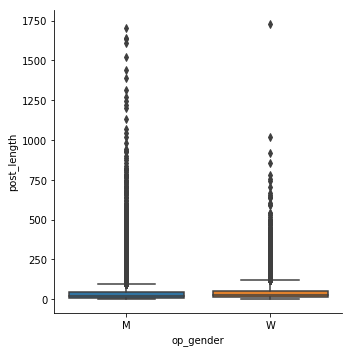

In [82]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=reddit_sample)

print('average post length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].post_length.mean())

So female posters typically have longer posts than male posters.

average response length when poster is male: 34.400743663681894
average response length when poster is female: 36.18058475062106


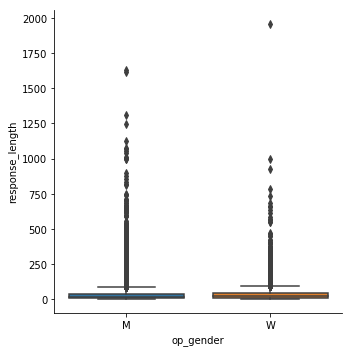

In [83]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=reddit_sample)

print('average response length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].response_length.mean())

Responses to female posters are a little bit longer than responses to male posters, but they are very close.

In [84]:
# summarize
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39534.0  40.045202  64.291841  1.0  11.0  22.0  44.0  1701.0   
W             10466.0  46.694439  64.878038  1.0  13.0  26.0  55.0  1731.0   

          response_length                                                       
                    count       mean        std  min   25%   50%   75%     max  
op_gender                                                                       
M                 39534.0  34.400744  53.988463  1.0   9.0  19.0  39.0  1629.0  
W                 10466.0  36.180585  53.705259  1.0  10.0  21.0  43.0  1959.0

In [85]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min    25%   50%  \
op_gender responder_gender                                                    
M                           35898.0  34.056716  53.809190  1.0   9.00  19.0   
          M                  2838.0  35.745948  54.165798  1.0   9.00  20.0   
          W                   798.0  45.092732  59.983092  1.0  12.25  26.0   
W                            9429.0  35.248489  48.967919  1.0   9.00  20.0   
          M                   763.0  45.483617  95.162360  1.0  11.00  23.0   
          W                   274.0  42.350365  46.547324  2.0  13.25  26.0   

                             75%     max  
op_gender responder_gender                
M                           39.0  1629.0  
          M                 41.0  1051.0  
          W                 49.0   667.0  
W                           42.0   923.0  
          M                 49.0  1959.0  
          W                 53.0   327.0

For now, we don't care about when responder gender isn't visible. Let's summarize:

#### Post length

Female posters seem to typically have longer posts than male posters.

#### Response length

Responses to female posters seem to be a little longer than responses to male posters. Let's dive a little deeper:

- Male poster/male responder has shorter response length than male poster/male responder.
- female poster/male responder has shorter response length than female poster/female responder.

Again, it seems that female responders typically have longer responses than male responders, regardless of the original poster's gender.

#### Gender x Gender

Interestingly, male responders have longer responses when responding to females than when responding to males. Female responders have longer responses when responding to females than when responding to males.

In [86]:
# getting sentence lengths
post_sent_count = reddit_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = reddit_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [87]:
# find average sentence length
post_avg_sent_length = reddit_sample.post_length / post_sent_count
response_avg_sent_length = reddit_sample.response_length / response_sent_count

In [88]:
# make new columns
reddit_sample['post_avg_slen'] = post_avg_sent_length
reddit_sample['response_avg_slen'] = response_avg_sent_length

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
18,18,2007scape,Tazzak9028,M,False,phySi0,M,False,"If youre using 07, just click on the black par...","Dont know why youre being downvoted, this work...","[If, youre, using, 07, ,, just, click, on, the...","[Dont, know, why, youre, being, downvoted, ,, ...",23,38,11.5,12.666667
28,28,2007scape,Tazzak9028,M,False,golayinthegrass,,unknown_gender,Which brings me to another point... Why do pe...,"More of a challenge, PvP is more exciting, not...","[Which, brings, me, to, another, point, ..., W...","[More, of, a, challenge, ,, PvP, is, more, exc...",13,15,13.0,15.000000
33,33,2007scape,SlayerMaster,M,False,HotcocoaBoy,,unknown_gender,Ive heard of people getting 70+ dry streaks. ...,That makes me feel luckier then!,"[Ive, heard, of, people, getting, 70+, dry, st...","[That, makes, me, feel, luckier, then, !]",15,7,5.0,7.000000
53,53,2007scape,Raven_Rise,M,False,rohirs,,unknown_gender,Im just a casual player ^I ^have ^no ^clue ^^w...,A program you can play runescape on instead of...,"[Im, just, a, casual, player, ^I, ^have, ^no, ...","[A, program, you, can, play, runescape, on, in...",13,33,13.0,16.500000
76,76,2007scape,nxqv,M,False,celery_under,,unknown_gender,Minipets are what push you away from other MMO...,"believe it or not, many different cosmetic fea...","[Minipets, are, what, push, you, away, from, o...","[believe, it, or, not, ,, many, different, cos...",20,17,10.0,17.000000


In [89]:
# what did we find?
reddit_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                  \
                  count       mean       std  min  25%   50%        75%   
op_gender                                                                 
M               39534.0  13.513121  8.561006  1.0  8.0  12.0  17.333333   
W               10466.0  13.860123  8.515618  1.0  8.0  12.5  18.000000   

                 response_avg_slen                                       \
             max             count       mean       std  min  25%   50%   
op_gender                                                                 
M          244.0           39534.0  12.744141  8.762622  1.0  7.0  11.0   
W          228.0           10466.0  12.752428  8.471320  1.0  7.0  11.0   

                             
                 75%    max  
op_gender                    
M          16.941176  264.0  
W          17.000000  226.0

In [90]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean       std  min  25%        50%  \
op_gender responder_gender                                                      
M                           35898.0  12.712397  8.835573  1.0  7.0  11.000000   
          M                  2838.0  12.906343  8.060598  1.0  7.0  11.333333   
          W                   798.0  13.595293  7.767187  1.0  8.0  12.500000   
W                            9429.0  12.689025  8.536491  1.0  7.0  11.000000   
          M                   763.0  13.292865  7.929939  1.0  7.0  12.000000   
          W                   274.0  13.429345  7.574901  1.5  8.0  12.500000   

                                  75%         max  
op_gender responder_gender                         
M                           16.798718  264.000000  
          M                 17.000000   79.333333  
          W                 17.650000   53.000000  
W                           16.714286  226.000000  
          M                 18.000000   58.000000  
          W                 17.645833   40.000000

What can we figure out from this?

#### Post sentence length

The average sentence length for both female and male posters is about the same.

#### Response sentence length

The average response length responding to both female and male posters is about the same. Also, the gender of the responder doesn't seem to make a difference in average sentence length in any case.

In [91]:
# computing average k-band
reddit_sample['post_avg_kband'] = reddit_sample.post_tokens.map(get_avg_google_kband)
reddit_sample['response_avg_kband'] = reddit_sample.response_tokens.map(get_avg_google_kband)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
18,18,2007scape,Tazzak9028,M,False,phySi0,M,False,"If youre using 07, just click on the black par...","Dont know why youre being downvoted, this work...","[If, youre, using, 07, ,, just, click, on, the...","[Dont, know, why, youre, being, downvoted, ,, ...",23,38,11.5,12.666667,1.764706,1.586207
28,28,2007scape,Tazzak9028,M,False,golayinthegrass,,unknown_gender,Which brings me to another point... Why do pe...,"More of a challenge, PvP is more exciting, not...","[Which, brings, me, to, another, point, ..., W...","[More, of, a, challenge, ,, PvP, is, more, exc...",13,15,13.0,15.000000,1.636364,1.900000
33,33,2007scape,SlayerMaster,M,False,HotcocoaBoy,,unknown_gender,Ive heard of people getting 70+ dry streaks. ...,That makes me feel luckier then!,"[Ive, heard, of, people, getting, 70+, dry, st...","[That, makes, me, feel, luckier, then, !]",15,7,5.0,7.000000,3.750000,1.000000
53,53,2007scape,Raven_Rise,M,False,rohirs,,unknown_gender,Im just a casual player ^I ^have ^no ^clue ^^w...,A program you can play runescape on instead of...,"[Im, just, a, casual, player, ^I, ^have, ^no, ...","[A, program, you, can, play, runescape, on, in...",13,33,13.0,16.500000,2.200000,1.566667
76,76,2007scape,nxqv,M,False,celery_under,,unknown_gender,Minipets are what push you away from other MMO...,"believe it or not, many different cosmetic fea...","[Minipets, are, what, push, you, away, from, o...","[believe, it, or, not, ,, many, different, cos...",20,17,10.0,17.000000,1.533333,1.600000


In [92]:
reddit_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                              \
                   count     mean       std  min       25%       50%   
op_gender                                                              
M                39089.0  2.52699  1.492697  1.0  1.750000  2.235294   
W                10352.0  2.46146  1.390889  1.0  1.758621  2.193548   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.857143  20.0            38895.0  2.531577  1.637161  1.0   
W          2.753208  20.0            10310.0  2.421044  1.424296  1.0   

                                               
                25%       50%       75%   max  
op_gender                                      
M          1.687500  2.200000  2.846154  20.0  
W          1.666667  2.133333  2.714286  20.0

In [93]:
reddit_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M                           35304.0  2.543445  1.662586  1.0  1.687500   
          M                  2803.0  2.437625  1.405257  1.0  1.674235   
          W                   788.0  2.334080  1.165758  1.0  1.672917   
W                            9286.0  2.430365  1.447539  1.0  1.666667   
          M                   754.0  2.362919  1.277616  1.0  1.690318   
          W                   270.0  2.262759  0.900857  1.0  1.743056   

                                 50%       75%        max  
op_gender responder_gender                                 
M                           2.200309  2.857143  20.000000  
          M                 2.142857  2.750000  20.000000  
          W                 2.098077  2.601786  13.000000  
W                           2.133333  2.720102  20.000000  
          M                 2.126856  2.631579  16.000000  
          W                 2.155870  2.625101   7.666667

Again, about the same.

### TED linguistic analysis

In [94]:
# how big is this?
ted_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190347 entries, 0 to 190413
Data columns (total 5 columns):
post_id          190347 non-null int64
op_id            190347 non-null object
op_gender        190347 non-null object
responder_id     190347 non-null object
response_text    190347 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [95]:
# reduce again for consistency (though I think this would be possible to handle anyways)
ted_sample = ted_responses_df.sample(50000)
ted_sample.sort_index(inplace=True)

In [96]:
# tokenize...
ted_sample['response_tokens'] = ted_sample.response_text.map(nltk.word_tokenize)

# ... and find length
ted_sample['response_length'] = ted_sample.response_tokens.map(len)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length
9,9,Aimee Mullins,W,Katja,This is just so absolutely gorgeous and so ful...,"[This, is, just, so, absolutely, gorgeous, and...",58
16,16,Aimee Mullins,W,David,I'd never heard of Aimee Mullins when she spok...,"[I, 'd, never, heard, of, Aimee, Mullins, when...",66
17,17,Aimee Mullins,W,Dany,"Wow, You have such a remarkable perspective on...","[Wow, ,, You, have, such, a, remarkable, persp...",58
25,25,Aimee Mullins,W,Thaddee,"So great ,it's deep as story This makes me spe...","[So, great, ,, it, 's, deep, as, story, This, ...",13
26,26,Aimee Mullins,W,Taleed,Aimee Mullins a name we should remember,"[Aimee, Mullins, a, name, we, should, remember]",7


average response length when poster is male: 93.27086302454474
average response length when poster is female: 92.56680429397193


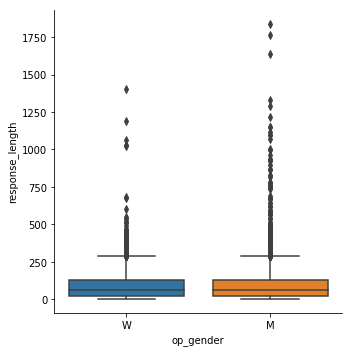

In [97]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=ted_sample)

print('average response length when poster is male:',
      ted_sample[ted_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      ted_sample[ted_sample.op_gender == 'W'].response_length.mean())

It seems responses are longer when the speaker is male than when they are female. Let's look at some more detail:

In [98]:
ted_sample.groupby('op_gender')['response_length'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37890.0,93.270863,95.980485,1.0,25.0,62.0,131.0,1840.0
W,12110.0,92.566804,93.639819,1.0,25.0,62.0,130.0,1401.0


In [99]:
# getting sentence lengths
response_sent_count = ted_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [100]:
# find average sentence length
response_avg_sent_length = ted_sample.response_length / response_sent_count

In [101]:
# make new column
ted_sample['response_avg_slen'] = response_avg_sent_length

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen
9,9,Aimee Mullins,W,Katja,This is just so absolutely gorgeous and so ful...,"[This, is, just, so, absolutely, gorgeous, and...",58,11.600000
16,16,Aimee Mullins,W,David,I'd never heard of Aimee Mullins when she spok...,"[I, 'd, never, heard, of, Aimee, Mullins, when...",66,13.200000
17,17,Aimee Mullins,W,Dany,"Wow, You have such a remarkable perspective on...","[Wow, ,, You, have, such, a, remarkable, persp...",58,19.333333
25,25,Aimee Mullins,W,Thaddee,"So great ,it's deep as story This makes me spe...","[So, great, ,, it, 's, deep, as, story, This, ...",13,13.000000
26,26,Aimee Mullins,W,Taleed,Aimee Mullins a name we should remember,"[Aimee, Mullins, a, name, we, should, remember]",7,7.000000


In [102]:
# summarize
ted_sample.groupby('op_gender')['response_avg_slen'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37890.0,18.565043,13.519130,1.0,11.25,16.900000,22.800000,499.0
W,12110.0,18.188682,12.745317,1.0,11.00,16.571429,22.571429,445.0


Sentence length seems to be about the same whether they are responding to a male vs. a female speaker.

In [103]:
# add average google k-band
ted_sample['response_avg_kband'] = ted_sample.response_tokens.map(get_avg_google_kband)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen,response_avg_kband
9,9,Aimee Mullins,W,Katja,This is just so absolutely gorgeous and so ful...,"[This, is, just, so, absolutely, gorgeous, and...",58,11.600000,1.800000
16,16,Aimee Mullins,W,David,I'd never heard of Aimee Mullins when she spok...,"[I, 'd, never, heard, of, Aimee, Mullins, when...",66,13.200000,1.961538
17,17,Aimee Mullins,W,Dany,"Wow, You have such a remarkable perspective on...","[Wow, ,, You, have, such, a, remarkable, persp...",58,19.333333,2.122449
25,25,Aimee Mullins,W,Thaddee,"So great ,it's deep as story This makes me spe...","[So, great, ,, it, 's, deep, as, story, This, ...",13,13.000000,1.111111
26,26,Aimee Mullins,W,Taleed,Aimee Mullins a name we should remember,"[Aimee, Mullins, a, name, we, should, remember]",7,7.000000,1.000000


In [104]:
ted_sample.groupby('op_gender')['response_avg_kband'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37630.0,2.264820,0.990772,1.0,1.787595,2.111332,2.494118,20.0
W,12009.0,2.261968,0.963996,1.0,1.797101,2.108696,2.500000,20.0


And once again, the google k-band doesn't really differ between genders.

## Linguistic difference in gender

Now let's get to some specifics! What about the content of someone's speech/writing makes it more likely for them to be male vs. female? There are some basic differences that have been noted, that I found in *Women, Men, and Language: A sociolinguistic account of gender differences in language*, by Jennifer Coates. There are a lot of differences that Coates discusses regarding gendered speak. Some only apply to actual speech, which is irrelevant in this case, and some require more exchanges other than a simple post/response. I'm gathering a short list of differences that I think would be manageable to investigate for my project:

- Hedges: Hedges express uncertainty, and overall, women seem to use more hedges than men. Some examples of hedges include I think, I guess, I mean, kind of, I’m sure, you know, sort of, perhaps, etc.
- Compliments: It was found that women give and receive more compliments than men. In a study of 484 exchanges of compliments, 51% were woman to woman, 9% were man to man, 23.1% were man to woman, and 16.5% were woman to man. This could also be related to politeness.
- Questions: Typically, women use questions to "avoid the role of expert," found in phrases such as "do you?", "aren't there?", "isn't it?", "right?", etc. On the other hand, men use questions to seek new information or introduce a new topic.

Let's look at the presence of these in our file samples:

In [105]:
# list of hedges
hedges = ['i think', 'i guess', 'i mean', 'kind of', "i'm sure", 'you know', 'sort of', 'perhaps']

# create function
def find_hedges(text):
    text = text.lower()
    num = 0
    for hedge in hedges:
        num = num + text.count(hedge)
    return num

In [106]:
# test function
print(find_hedges('I guess!'))
print(find_hedges('I think you know that I sort of'))
print(find_hedges("Perhaps I'm SURE"))

1
3
2


In [107]:
# hedges in facebook congress (since we don't know responder gender, hedges for them don't really matter)
fb_congress_sample['post_hedges'] = fb_congress_sample.post_text.map(find_hedges)

fb_congress_sample.groupby('op_gender')['post_hedges'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37532.0,0.028829,0.205880,0.0,0.0,0.0,0.0,7.0
W,12468.0,0.053497,0.258227,0.0,0.0,0.0,0.0,2.0


In [109]:
# male posters with hedges
male_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'M') & (fb_congress_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'W') & (fb_congress_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_congress_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges.index) / fb_congress_sample.op_gender.value_counts()['W'])

percentage male posters with hedges: 0.02432590855803048
percentage female posters with hedges: 0.045476419634263715


So there seems to be a little more hedges in posts from women!

In [110]:
# hedges in facebook wiki
fb_wiki_sample['post_hedges'] = fb_wiki_sample.post_text.map(find_hedges)

fb_wiki_sample.groupby('op_gender')['post_hedges'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,16718.0,0.040316,0.244192,0.0,0.0,0.0,0.0,4.0
W,33282.0,0.019049,0.146052,0.0,0.0,0.0,0.0,3.0


In [111]:
# male posters with hedges
male_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'M') & (fb_wiki_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'W') & (fb_wiki_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_wiki_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges.index) / fb_wiki_sample.op_gender.value_counts()['W'])

percentage male posters with hedges: 0.03265940902021773
percentage female posters with hedges: 0.017847485127095726


This time, male posters seem to have more hedges... Let's keep going.

In [112]:
# hedges in fitocracy
fitocracy_sample['post_hedges'] = fitocracy_sample.post_text.map(find_hedges)
fitocracy_sample['response_hedges'] = fitocracy_sample.response_text.map(find_hedges)

print(fitocracy_sample.groupby('op_gender')['post_hedges'].describe())
print(fitocracy_sample.groupby('responder_gender')['response_hedges'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          27350.0  0.027313  0.175733  0.0  0.0  0.0  0.0  6.0
W          22650.0  0.028124  0.174426  0.0  0.0  0.0  0.0  3.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
M                 24231.0  0.033346  0.190038  0.0  0.0  0.0  0.0  3.0
W                 25769.0  0.025535  0.166133  0.0  0.0  0.0  0.0  3.0


In [153]:
# male posters with hedges
male_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'M') & (fitocracy_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'W') & (fitocracy_sample.post_hedges != 0)]
# female responders with hedges
female_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.02555758683729433
percentage female posters with hedges: 0.026710816777041943
percentage male responders with hedges: 0.03165366679047501
percentage female responders with hedges: 0.02429275486049129


This time, female posters have more hedges than male posters, but male responders have more hedges than female responders. Now onto Reddit:

In [114]:
# hedges in reddit
reddit_sample['post_hedges'] = reddit_sample.post_text.map(find_hedges)
reddit_sample['response_hedges'] = reddit_sample.response_text.map(find_hedges)

print(reddit_sample.groupby('op_gender')['post_hedges'].describe())
print(reddit_sample.groupby('responder_gender')['response_hedges'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          39534.0  0.104998  0.376341  0.0  0.0  0.0  0.0  8.0
W          10466.0  0.133862  0.426931  0.0  0.0  0.0  0.0  8.0
                    count      mean       std  min  25%  50%  75%   max
responder_gender                                                       
                  45327.0  0.104110  0.365156  0.0  0.0  0.0  0.0  10.0
M                  3601.0  0.117745  0.399331  0.0  0.0  0.0  0.0   6.0
W                  1072.0  0.165112  0.486777  0.0  0.0  0.0  0.0   5.0


In [152]:
# male posters with hedges
male_hedges_post = reddit_sample[(reddit_sample.op_gender == 'M') & (reddit_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = reddit_sample[(reddit_sample.op_gender == 'W') & (reddit_sample.post_hedges != 0)]
# female responders with hedges
female_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / reddit_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / reddit_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / reddit_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / reddit_sample.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.08825314918804067
percentage female posters with hedges: 0.11102618001146569
percentage male responders with hedges: 0.09802832546514857
percentage female responders with hedges: 0.13059701492537312


This is what we like to see! In both categories (poster and responder), women use more hedges. We can't do our hedge analysis on our last file (TED) because the gender isn't listed for the responder.

## Machine Learning
Let's gather everything I want for machine learning!

I have two goals:
1. I want to analyze the text, regardless of whether it's poster or responder, and train to identify gender. To do this, I'll use my samples from before and combine them to suit my purpose.

In [165]:
# we don't know gender for responder in fb congress, only gather post data
fb_congress_posts_sample = fb_congress_sample[['op_gender', 'post_text','post_tokens','post_length','post_avg_slen','post_hedges']]
#fb_congress_posts_sample.head()

# we don't know gender for responder in fb wiki, only gather post data
fb_wiki_posts_sample = fb_wiki_sample[['op_gender', 'post_text','post_tokens','post_length','post_avg_slen','post_hedges']]
#fb_wiki_posts_sample.head()

# we know gender for poster and responder in fitocracy
fit_posts_sample = fitocracy_sample[['op_gender', 'post_text','post_tokens','post_length','post_avg_slen','post_hedges']]
fit_responses_sample = fitocracy_sample[['responder_gender', 'response_text','response_tokens','response_length','response_avg_slen','response_hedges']]
#fit_posts_sample.head()
#fit_responses_sample.head()

# we know gender for poster and some responders in reddit
reddit_posts_sample = reddit_sample[['op_gender', 'post_text','post_tokens','post_length','post_avg_slen','post_hedges']]
reddit_responses_sample = reddit_sample[reddit_sample.responder_gender != ''][['responder_gender', 'response_text','response_tokens','response_length','response_avg_slen','response_hedges']]
#reddit_posts_sample.head()
#reddit_responses_sample.head()

# we don't know gender for responder in TED

In [171]:
# merge them

# first, change column names
columns = ['gender', 'text', 'tokens', 'text_length', 'avg_slen', 'hedges']
fb_congress_posts_sample.columns = columns
fb_wiki_posts_sample.columns = columns
fit_posts_sample.columns = columns
fit_responses_sample.columns = columns
reddit_posts_sample.columns = columns
reddit_responses_sample.columns = columns

# add source column
fb_congress_posts_sample['source'] = 'fb_congress_post'
fb_wiki_posts_sample['source'] = 'fb_wiki_post'
fit_posts_sample['source'] = 'fitocracy_post'
fit_responses_sample['source'] = 'fitocracy_response'
reddit_posts_sample['source'] = 'reddit_post'
reddit_responses_sample['source'] = 'reddit_response'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [172]:
# now merge them
all_posts_responses = pd.concat([fb_congress_posts_sample, fb_wiki_posts_sample, fit_posts_sample,
                                 fit_responses_sample, reddit_posts_sample, reddit_responses_sample],
                                ignore_index=True)

all_posts_responses.head()

,gender,text,tokens,text_length,avg_slen,hedges,source
0,M,"""I agree 100% with President Trump's decision....","[``, I, agree, 100, %, with, President, Trump,...",57,14.25,0,fb_congress_post
1,M,It's time to put Obama in the history books. W...,"[It, 's, time, to, put, Obama, in, the, histor...",37,18.50,0,fb_congress_post
2,M,Shameful.,"[Shameful, .]",2,2.00,0,fb_congress_post
3,M,"In Texas, we're proud to say Merry Christmas.","[In, Texas, ,, we, 're, proud, to, say, Merry,...",11,11.00,0,fb_congress_post
4,M,"In Texas, we're proud to say Merry Christmas.","[In, Texas, ,, we, 're, proud, to, say, Merry,...",11,11.00,0,fb_congress_post


In [174]:
all_posts_responses.source.value_counts()

reddit_post           50000
fitocracy_post        50000
fb_wiki_post          50000
fitocracy_response    50000
fb_congress_post      50000
reddit_response        4673
Name: source, dtype: int64

Seems like it's merged well! Let's pickle it!

In [175]:
import pickle

all_posts_responses.to_pickle("all_posts_responses.pkl")

2. For deeper analysis, I want to focus on when we know the gender of the OP and the responder so I can analyze how people respond to different genders. Which files will work for this?
    - Fitocracy: genders are present for all posters/responders
    - Reddit: genders are present for all posters and only some responders

Looks like only two files. How big are these?

In [116]:
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [117]:
# getting rid of when we don't know responder's gender
# want op gender to be visible so we know the responder is aware of what gender they are replying to
reddit_gender_visible = reddit_df[(reddit_df.responder_gender != '') & (reddit_df.op_gender_visible == True)]
reddit_gender_visible.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78231 entries, 51026 to 1314987
Data columns (total 10 columns):
post_id                     78231 non-null int64
subreddit                   78231 non-null object
op_id                       78231 non-null object
op_gender                   78231 non-null object
op_gender_visible           78231 non-null bool
responder_id                78231 non-null object
responder_gender            78231 non-null object
responder_gender_visible    78231 non-null object
post_text                   78231 non-null object
response_text               78231 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 6.0+ MB


How should we merge these?

Both have columns for post_id, op_id, op_gender, responder_id, responder_gender, post_text, and response_text. Additionally, the Reddit data also has a column for subreddit, op_gender_visible, and responder_gender_visible. These probably don't matter for what I want to do with machine learning though - I'm more interested in the actual text. So let's delete these columns from reddit_df. Let's also add a 'source' column so we can tell where they came from when it's merged:

In [118]:
fitocracy_df['source'] = 'fitocracy'
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [119]:
reddit_gender_visible = reddit_gender_visible.drop(labels=['subreddit','op_gender_visible','responder_gender_visible'], axis=1)
reddit_gender_visible['source'] = 'reddit'
reddit_gender_visible.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
51026,51026,Uphoria,M,QuixoticChemist,W,I agree with this. most guys wont think twice ...,I think theyre are a few males in my lab this ...,reddit
51028,51028,Uphoria,M,MobileD,M,I honestly wouldnt. There are two things to c...,Basically this. I would recommend holding off...,reddit
51029,51029,satinbirdy,W,ninjarxa,M,Such a classic question! Im not a guy but Ive ...,whenever you make contact with another person ...,reddit
51030,51030,phukka,M,BroccoliFarts,W,"If its a guy that you might see often, a co-wo...",He is a coworker but I only work with him thre...,reddit
51031,51031,BroccoliFarts,W,phukka,M,He is a coworker but I only work with him thre...,"Also, watch how he interacts with his other co...",reddit


In [120]:
gender_visible_df = pd.concat([fitocracy_df, reddit_gender_visible], ignore_index=True)

# let's drop the post id column too and just use the index as post id
gender_visible_df.drop(labels=['post_id'], axis=1, inplace=True)

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [121]:
gender_visible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396766 entries, 0 to 396765
Data columns (total 7 columns):
op_id               396766 non-null object
op_gender           396766 non-null object
responder_id        396766 non-null object
responder_gender    396766 non-null object
post_text           396766 non-null object
response_text       396766 non-null object
source              396766 non-null object
dtypes: object(7)
memory usage: 21.2+ MB


In [122]:
# now let's do the same linguistic calculations to this df
# not including k-band, because when we did it above, there were no noticeable differences between genders

# tokenize...
gender_visible_df['post_tokens'] = gender_visible_df.post_text.map(nltk.word_tokenize)
gender_visible_df['response_tokens'] = gender_visible_df.response_text.map(nltk.word_tokenize)

# ... and find length
gender_visible_df['post_length'] = gender_visible_df.post_tokens.map(len)
gender_visible_df['response_length'] = gender_visible_df.response_tokens.map(len)

In [123]:
# getting sentence lengths
post_sent_count = gender_visible_df.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = gender_visible_df.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

# find average sentence length
post_avg_sent_length = gender_visible_df.post_length / post_sent_count
response_avg_sent_length = gender_visible_df.response_length / response_sent_count

# make new columns
gender_visible_df['post_avg_slen'] = post_avg_sent_length
gender_visible_df['response_avg_slen'] = response_avg_sent_length

In [124]:
# adding column for hedges
gender_visible_df['post_hedges'] = gender_visible_df.post_text.map(find_hedges)
gender_visible_df['response_hedges'] = gender_visible_df.response_text.map(find_hedges)

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_hedges,response_hedges
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy,"[Thanks, for, the, follow, !, I, followed, bac...","[One, day, at, a, time, !, =, ]]",25,8,12.5,4.000000,0,0
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9,13.0,9.000000,0,0
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy,"[Umm, ,, yeah, ,, so, those, are, assisted, pu...","[You, can, enter, assisted, pullups, ., Select...",19,57,9.5,11.400000,0,0
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy,"[dam, gurl, lookin, mad, tone, in, dat, pp, ho...","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,10,10.0,5.000000,0,0
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy,"[What, 's, up, there, bear, mode, ?]","[Hey, !, I, just, started, a, new, job, ,, so,...",7,26,7.0,8.666667,0,0


In [148]:
# look at some of the hedges
samples = gender_visible_df[gender_visible_df.response_hedges != 0].sample(5)

for index, row in samples.iterrows():
    print('text:', row.response_text)
    print('number of hedges:', row.response_hedges)
    print('gender:', row.responder_gender)
    print('--------------')

text: I guess!  Running gives lotsa points I guess :P  Haven't logged any workouts for the past couple days because I'm too lazy to computer
number of hedges: 2
gender: W
--------------
text: I dont know about being irresistible ... but hell yes, I absolutely assume they are trying to get in pants (doesnt even necessarily have to be mine). I could be wrong, but [~~where Im from~~ in my experience] 9 times out of 10 guys dont just go up to a girl and start chatting with her for absolutely no reason (and Im speaking strictly from the social scene like bars, clubs, parties etc.).   *Let me approach this girl, because she looks interesting. Im not interested in sex at all. Lets share interests and walk away as complete strangers never to speak again.*  Right.....   Maybe I have tons of misconceptions about male/female interaction, maybe Ive been scarred by past ~~stalkers~~ experiences, perhaps its the type of guys that approach me, but whatever it is I err on the side of caution and just 

Now that we've done all this work - let's pickle the dataframe! I'm going to create a new file for the machine learning and reopen the dataframe there.

In [149]:
gender_visible_df.to_pickle("gender_visible_df.pkl")